### Final Project: Financial fraud detection

In [7]:
# Import libraries
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import and Preprocess the Data

In [2]:
# Get the real data from https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset
data = pd.read_csv('/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Final Project/ethereum_dataset.csv')
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


We choose FLAG as our targeted variable, and choose the following columns as our predictors: Avg min between sent tnx, Avg_min_between_received_tnx, Time_Diff_between_first_and_last(Mins), Sent_tnx, Received_tnx, Number_of_Created_Contracts, Unique_Received_From_Addresses, Unique_Sent_To_Addresses20, Min_Value_Received, Max_Value_Received, Avg_Value_Received, Min_Val_Sent, Max_Val_Sent, Avg_Val_Sent variables.

In [3]:
data = data.iloc[:,3:18]
data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688


In [4]:
data.dtypes

FLAG                                         int64
Avg min between sent tnx                   float64
Avg min between received tnx               float64
Time Diff between first and last (Mins)    float64
Sent tnx                                     int64
Received Tnx                                 int64
Number of Created Contracts                  int64
Unique Received From Addresses               int64
Unique Sent To Addresses                     int64
min value received                         float64
max value received                         float64
avg val received                           float64
min val sent                               float64
max val sent                               float64
avg val sent                               float64
dtype: object

In [5]:
data.isna().sum()

FLAG                                       0
Avg min between sent tnx                   0
Avg min between received tnx               0
Time Diff between first and last (Mins)    0
Sent tnx                                   0
Received Tnx                               0
Number of Created Contracts                0
Unique Received From Addresses             0
Unique Sent To Addresses                   0
min value received                         0
max value received                         0
avg val received                           0
min val sent                               0
max val sent                               0
avg val sent                               0
dtype: int64

In [6]:
data['FLAG'].unique()

array([0, 1])

FLAG is 0, indicating no fraud detected; FLAG is 1, indicating fraud detected.

In [8]:
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000


In [9]:
data.FLAG.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

<Axes: xlabel='FLAG', ylabel='count'>

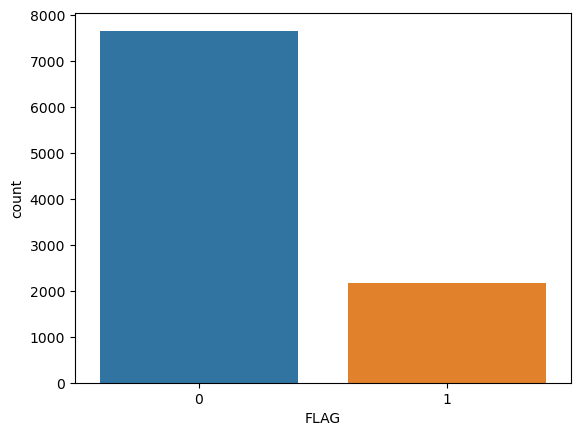

In [10]:
sns.countplot(x = data.FLAG)

### Modeling

In [13]:
# Prepare the training and validating set
from sklearn.model_selection import train_test_split
all_features = data.iloc[:, 1:].values
all_targets = data.iloc[:, [0]].values

train_features, val_features, train_targets, val_targets = train_test_split(
    all_features, all_targets, test_size=0.2, random_state=42)

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 7872
Number of validation samples: 1969


### Analyze class imbalance in the targets

In [16]:
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 1752 (22.26% of total)


### Normalize the data using training set statistics

In [14]:
mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

### Build a binary classification model

In [15]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

2024-06-10 19:24:08.031095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,681 (530.00 KB)

 Trainable params: 135,681 (530.00 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model with class_weight argument

In [18]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.keras")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/30
4/4 - 4s - 965ms/step - fn: 588.0000 - fp: 2860.0000 - loss: 1.7104e-04 - precision: 0.2893 - recall: 0.6644 - tn: 3260.0000 - tp: 1164.0000 - val_fn: 52.0000 - val_fp: 795.0000 - val_loss: 0.6290 - val_precision: 0.3205 - val_recall: 0.8782 - val_tn: 747.0000 - val_tp: 375.0000
Epoch 2/30
4/4 - 0s - 52ms/step - fn: 236.0000 - fp: 3042.0000 - loss: 1.5667e-04 - precision: 0.3326 - recall: 0.8653 - tn: 3078.0000 - tp: 1516.0000 - val_fn: 47.0000 - val_fp: 755.0000 - val_loss: 0.6233 - val_precision: 0.3348 - val_recall: 0.8899 - val_tn: 787.0000 - val_tp: 380.0000
Epoch 3/30
4/4 - 0s - 47ms/step - fn: 233.0000 - fp: 2869.0000 - loss: 1.4778e-04 - precision: 0.3462 - recall: 0.8670 - tn: 3251.0000 - tp: 1519.0000 - val_fn: 50.0000 - val_fp: 691.0000 - val_loss: 0.5689 - val_precision: 0.3530 - val_recall: 0.8829 - val_tn: 851.0000 - val_tp: 377.0000
Epoch 4/30
4/4 - 0s - 48ms/step - fn: 257.0000 - fp: 2562.0000 - loss: 1.4212e-04 - precision: 0.3685 - recall: 0.8533 - tn: 3558

### Conclusion

At the end of training, out of 1969 validation transactions,number of fraud cases in validation data: 304 (16.40% of total),we are:

- Correctly identifying 402 of them as fraudulent
- Missing 35 fraudulent transactions
- At the cost of incorrectly flagging 339 legitimate transactions.
- the recall score of validation sample is 0.9451. Because of our data is an imbalanced dataset, so we choose to use recall as our main metric.

In the real world, one would put an even higher weight on class 1, so as to reflect that False Negatives are more costly than False Positives.